<a href="https://colab.research.google.com/github/varunpanchal283/Major-Project/blob/main/Car_Resale_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kora

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from kora.selenium import wd
from time import sleep
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import threading
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import pickle

#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split


#libraries for models
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from yellowbrick.regressor import AlphaSelection

from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import AdaBoostRegressor

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install xgboost

In [ ]:
global carTitle,money,feature
carTitle=[]
money=[]
feature=[]
place=[]
auto_manu=[]

def pspk(url):
  global carTitle,money,feature
  wd.get(url)
  SCROLL_PAUSE_TIME = 4
  last_height = wd.execute_script("return document.body.scrollHeight")
  while True:
      # Scroll down to bottom
      wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")

      # Wait to load page
      sleep(SCROLL_PAUSE_TIME)
      new_height = wd.execute_script("return document.body.scrollHeight")
      if new_height == last_height:
          break
      last_height = new_height

  r=wd.page_source
  soup=bs(r,'html.parser').find_all("div",attrs={"class":'_1l4fi'})
  place_h=bs(r,'html.parser').find('p',attrs={"class":"_1V4-O"})
  for i in soup:
    if i!=None:
      sus=bs(str(i),"html.parser")
      ss=sus.find("h2")
      if ss is None:
        carTitle.append(np.Nan)
      else:
        carTitle.append(str(ss.text))
      price = sus.find('div',attrs={'class' : '_7udZZ'})
      if price is None:
        money.append(np.NaN)
      else:
        money.append(str(price.text))
      detail=sus.find('ul',attrs={'class':'bVR0c'})
      if detail is None:
        feature.append(np.NaN)
      else:
        feature.append(detail.text)
      place.append(place_h.text)
      am=sus.find('p',attrs={'class':'cvakB'})
      if am is None:
        auto_manu.append(np.NaN)
      else:
        if "Manual" in am.text:
          auto_manu.append("Manual")
        elif "Automatic" in am.text:
          auto_manu.append("Automatic")
        else:
          auto_manu.append(np.NaN)
urls=["https://www.cars24.com/buy-used-car?sort=P&storeCityId=2&pinId=110001",
      "https://www.cars24.com/buy-used-car?sort=P&storeCityId=134&pinId=201301",
      "https://www.cars24.com/buy-used-car?sort=P&storeCityId=5&pinId=122001",
      "https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=400001",
      "https://www.cars24.com/buy-used-car?sort=P&storeCityId=2423&pinId=411001",
      "https://www.cars24.com/buy-used-car?sort=P&storeCityId=4709&pinId=560001",
      "https://www.cars24.com/buy-used-car?sort=P&storeCityId=3686&pinId=500001",
      "https://www.cars24.com/buy-used-car?sort=P&storeCityId=5732&pinId=600001",
      "https://www.cars24.com/buy-used-car?sort=P&storeCityId=777&pinId=700001",
      "https://www.cars24.com/buy-used-car?sort=P&storeCityId=1692&pinId=380001"
      ]
for i in urls:
  pspk(i)

In [ ]:
print(len(auto_manu))

NameError: ignored

In [ ]:
df = pd.DataFrame({'PRODUCT' : carTitle,'DETAIL':feature ,'MRP':money,'Place':place,'Auto/Man':auto_manu})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5148 entries, 0 to 5147
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   PRODUCT   5148 non-null   object
 1   DETAIL    5148 non-null   object
 2   MRP       5148 non-null   object
 3   Place     5148 non-null   object
 4   Auto/Man  5107 non-null   object
dtypes: object(5)
memory usage: 201.2+ KB


In [ ]:
df.tail(5)

,PRODUCT,DETAIL,MRP,Place,Auto/Man
5143,2013 Hyundai Eon,"46,257 km1st OwnerPetrol","₹2,64,799",Ahmedabad,Manual
5144,2019 Maruti Dzire,"12,645 km1st OwnerPetrol","₹6,94,799",Ahmedabad,Manual
5145,2019 Maruti Baleno,"27,158 km1st OwnerPetrol","₹6,61,199",Ahmedabad,Manual
5146,2017 Honda Brio,"18,821 km1st OwnerPetrol","₹5,84,999",Ahmedabad,Automatic
5147,2018 Maruti Alto 800,"42,124 km1st OwnerPetrol","₹3,10,299",Ahmedabad,Manual


In [ ]:
df.isnull().sum()

PRODUCT      0
DETAIL       0
MRP          0
Place        0
Auto/Man    41
dtype: int64

In [ ]:
df=df.dropna(axis=0)

In [ ]:
df["Auto/Man"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
import regex as re
regex = '.*km'
df['MILAGECOVERED'] = df['DETAIL'].apply(lambda x : re.findall(regex, x) if(re.findall(regex, x)!=[]) else ["0"])
regex = '[\d]+[a-z]+[a-z]+[\s]+Owner'
df['INHAND'] = df['DETAIL'].apply(lambda x : re.findall(regex, x))
regex = 'Petrol|Diesel|Petrol+CNG}{1,1}'
df['ENGINETYPE'] = df['DETAIL'].apply(lambda x : re.findall(regex, x))
regex = '[1-90]{4}'
df['MANUFACTURE'] = df['PRODUCT'].apply(lambda x : re.findall(regex, x))
regex = '[^1-90]+[\d\w]'
df['NAME'] = df['PRODUCT'].apply(lambda x : x[5:])

In [ ]:
df.NAME= df.NAME.apply(lambda x : ''.join(x))
df.ENGINETYPE= df.ENGINETYPE.apply(lambda x : ''.join(x))
df.MANUFACTURE= df.MANUFACTURE.apply(lambda x : ''.join(x))
df.MILAGECOVERED= df.MILAGECOVERED.apply(lambda x : ''.join(x))
df.INHAND= df.INHAND.apply(lambda x : ''.join(x))

In [ ]:
df.MRP = df.MRP.apply(lambda x : x.replace('₹', '').replace(',', '')).astype(float)

In [ ]:
df.MANUFACTURE = df.MANUFACTURE.apply(lambda x : x.replace('₹', '').replace(',', '')).astype(int)

In [ ]:
df.MILAGECOVERED = df.MILAGECOVERED.apply(lambda i : i.replace('km', '').replace(' ', '').replace('\n','').replace(',','')).astype(float)

In [ ]:
df['Brand_Name'] = df['NAME'].str.split(' ').str[0]
df["Model"]=df['NAME'].str.split(' ').str[1:]
df.Model= df.Model.apply(lambda x : ' '.join(x))
df=df.drop(["NAME"],axis='columns')

In [ ]:
df=df[['Brand_Name','Model','Place','ENGINETYPE','MANUFACTURE','MILAGECOVERED','INHAND','Auto/Man','MRP']]

In [ ]:
df.head(10)

,Brand_Name,Model,Place,ENGINETYPE,MANUFACTURE,MILAGECOVERED,INHAND,Auto/Man,MRP
0,13,95,7,0,6,68316.0,0,1,522599.0
1,14,90,7,0,6,98106.0,0,1,416399.0
2,14,10,7,1,11,10881.0,0,1,427199.0
3,14,89,7,0,7,45601.0,0,1,432499.0
4,7,117,7,0,5,64542.0,0,1,364899.0
5,14,10,7,1,10,23859.0,0,0,392999.0
6,14,89,7,0,7,89724.0,0,1,392899.0
7,14,89,7,1,6,107937.0,0,1,392399.0
8,5,35,7,0,6,156338.0,0,1,455199.0
9,14,39,7,0,5,113060.0,0,1,459999.0


In [ ]:
le_ENGINETYPE=LabelEncoder()
le_Brand_Name=LabelEncoder()
le_Model=LabelEncoder()
le_INHAND=LabelEncoder()
le_Place=LabelEncoder()
le_Automan=LabelEncoder()
le_Year=LabelEncoder()
df['ENGINETYPE']= le_ENGINETYPE.fit_transform(df['ENGINETYPE'])
df['Brand_Name']=le_Brand_Name.fit_transform(df['Brand_Name'])
df['Model']=le_Model.fit_transform(df['Model'])
df['INHAND']=le_INHAND.fit_transform(df['INHAND'])
df['Place']=le_Place.fit_transform(df['Place'])
df['Auto/Man']=le_Automan.fit_transform(df['Auto/Man'])
df['MANUFACTURE']=le_Year.fit_transform(df['MANUFACTURE'])

In [ ]:
pip install configparser

In [ ]:
import configparser
config = configparser.ConfigParser()
x={}
k=0
for i in le_ENGINETYPE.classes_:
  x[i]=k
  k+=1
config["Engine Type"]=x
#print(le_ENGINETYPE.classes_)

x={}
k=0
for i in le_Brand_Name.classes_:
  x[i]=k
  k+=1
config["Brand"]=x
#print(le_Brand_Name.classes_)

x={}
k=0
for i in le_Model.classes_:
  x[i]=k
  k+=1
config["Model"]=x
#print(le_Model.classes_)

x={}
k=0
for i in le_INHAND.classes_:
  x[i]=k
  k+=1
config["Inhand"]=x
#print(le_INHAND.classes_ )

x={}
k=0
for i in le_Place.classes_:
  x[i]=k
  k+=1
config["Place"]=x
#print(le_Place.classes_)

x={}
k=0
for i in le_Automan.classes_:
  x[i]=k
  k+=1
config["Automan"]=x

x={}
k=0
for i in le_Year.classes_:
  x[i]=k
  k+=1
config["Year"]=x

with open('example.ini', 'w') as configfile:
  config.write(configfile)



In [ ]:
config = configparser.ConfigParser()
config.read("example.ini")
for i in config['Engine Type']:
  print(i,config['Engine Type'][i])

0 Diesel
1 Petrol


In [ ]:
df3_input=df.drop(["MRP"],axis='columns')
df3_target=df['MRP']

In [ ]:
df.to_csv("cars24_y.csv")

In [ ]:
def trainingData(df,n):
    X = df.iloc[:,n]
    y = df.iloc[:,-1:].values.T
    y=y[0]
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=0)
    return (X_train,X_test,y_train,y_test)

X_train,X_test,y_train,y_test=trainingData(df,list(range(len(list(df.columns))-1)))

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4710 entries, 1726 to 2751
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand_Name     4710 non-null   int64  
 1   Model          4710 non-null   int64  
 2   Place          4710 non-null   int64  
 3   ENGINETYPE     4710 non-null   int64  
 4   MANUFACTURE    4710 non-null   int64  
 5   MILAGECOVERED  4710 non-null   float64
 6   INHAND         4710 non-null   int64  
 7   Auto/Man       4710 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 331.2 KB


In [ ]:
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])  

In [ ]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)
r5_rf=result(y_test,y_pred)
print("MSLE : {}".format(r5_rf[0]))
print("Root MSLE : {}".format(r5_rf[1]))
print("R2 Score : {} or {}%".format(r5_rf[2],r5_rf[3]))
accu['RandomForest Regressor']=r5_rf

MSLE : 0.011411449301026114
Root MSLE : 0.1068243853295029
R2 Score : 0.9222876768608712 or 92.2288%


In [ ]:
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.6
)

ABR.fit(X_train, y_train)
y_pred = ABR.predict(X_test)
#model evaluation
r7_ab=result(y_test,y_pred)
print("MSLE : {}".format(r7_ab[0]))
print("Root MSLE : {}".format(r7_ab[1]))
print("R2 Score : {} or {}%".format(r7_ab[2],r7_ab[3]))
accu['AdaBoost Regression']=r7_ab

MSLE : 0.009710287919306278
Root MSLE : 0.09854079317372211
R2 Score : 0.923109804076181 or 92.311%


In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
X_test = X_test.to_numpy()
X_train = X_train.to_numpy()
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)
#model evaluation
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r8_xg=result(y_test_1,y_pred_1)
print("MSLE : {}".format(r8_xg[0]))
print("Root MSLE : {}".format(r8_xg[1]))
print("R2 Score : {} or {}%".format(r8_xg[2],r8_xg[3]))
accu['XGBoost Regressor']=r8_xg

MSLE : 0.010034994807991311
Root MSLE : 0.10017482122764837
R2 Score : 0.9342202760802714 or 93.422%


In [ ]:
accu.to_csv('errors.csv')
accu=pd.read_csv('./errors.csv',index_col=0)
accu

,RandomForest Regressor,AdaBoost Regression,XGBoost Regressor
MSLE,0.011489,0.010662,0.010992
Root MSLE,0.107186,0.103259,0.104841
R2 Score,0.932745,0.935706,0.933847
Accuracy(%),93.274500,93.570600,93.384700


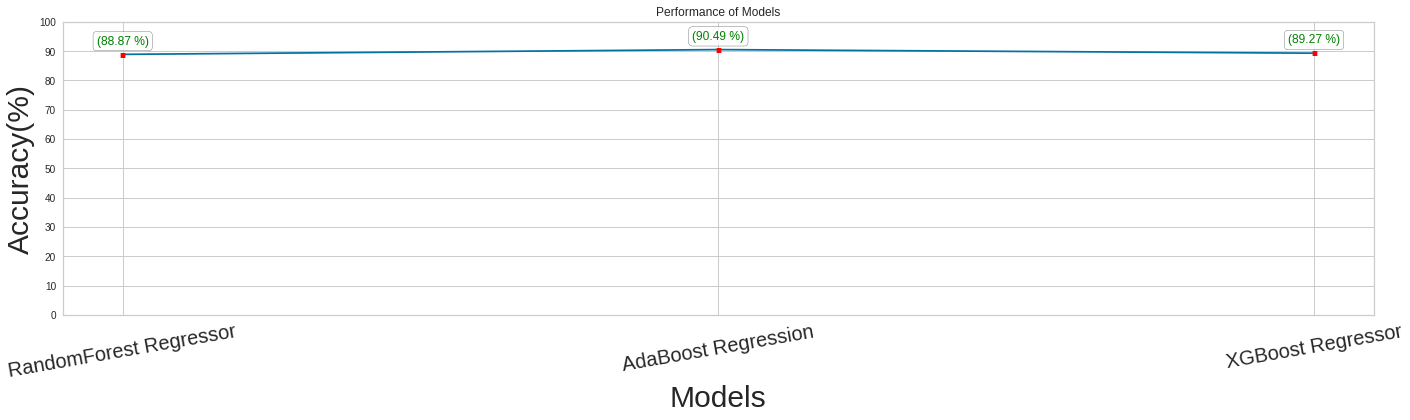

In [ ]:
model_accuracy=accu.loc['Accuracy(%)']
x=list(range(len(model_accuracy)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show();

In [ ]:
pickle.dump(ABR, open('abr.sav', 'wb'))
pickle.dump(xg_reg, open('xg.sav', 'wb'))
pickle.dump(RFR, open('rfr.sav', 'wb'))

In [ ]:
mymodel = pickle.load(open('xg.sav', 'rb'))

In [ ]:
df.head(1)

,Brand_Name,Model,Place,ENGINETYPE,MANUFACTURE,MILAGECOVERED,INHAND,Auto/Man,MRP
0,13,95,7,0,6,68316.0,0,1,522599.0


In [ ]:
mymodel.predict([[14, 10, 4, 1, 10, 40000, 1, 1]])

array([701419.06], dtype=float32)

In [ ]:
pip install lightgbm

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lgbm = GaussianNB()

lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)
#model evaluation
r7_ab=result(y_test,y_pred)
print("MSLE : {}".format(r7_ab[0]))
print("Root MSLE : {}".format(r7_ab[1]))
print("R2 Score : {} or {}%".format(r7_ab[2],r7_ab[3]))
accu['AdaBoost Regression']=r7_ab